# Exercises for Lecture 8 (Logistic Regression)

In [1]:
import datetime
now = datetime.datetime.now()
print("Last executed: " + now.strftime("%Y-%m-%d %H:%M:%S"))

Last executed: 2024-01-10 00:20:02


In [2]:
# Common imports
import os
import numpy as np
np.random.seed(0) # To make this notebook's output stable across runs

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Consider the [wine recognition dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-recognition-dataset):

In [3]:
from sklearn import datasets

wine = datasets.load_wine()
list(wine.keys())

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']

In [4]:
wine['data'].shape

(178, 13)

This dataset is made up of 13 features. These features are the results of a chemical analysis of wines grown by three different cultivators in the same region in Italy:

In [5]:
wine["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

Each of the 3 different wines is a class:

In [6]:
wine["target_names"]

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

## Exercise 1: Using only the first feature (the percentage of `alcohol` in the wine), train a binary logistic regressor to classify `class_1` wines

### Set up the one dimensional training data , and train the model

Make sure you select the correct feature!

(Hint: refer to the `wine["feature_names"]` above.)

In [7]:
X_1d = wine["data"][:, 0]  # alcohol
X_1d = X_1d.reshape(-1, 1)

y = (wine["target"] == 1).astype(int)  # 1 if class_1, else 0

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_1d, y)

LogisticRegression(random_state=0)

### Plot the models predictions, along with the decision boundary, and the training data

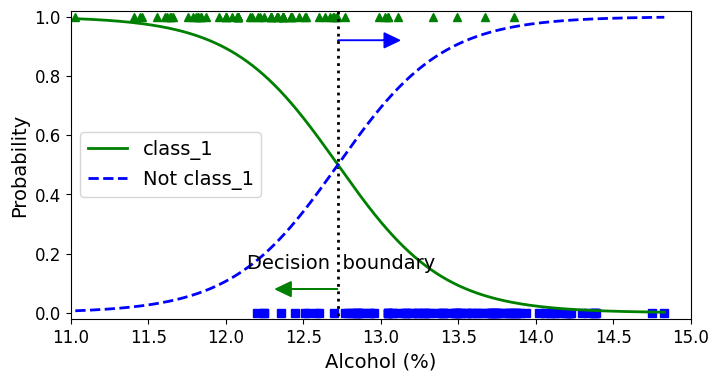

In [8]:
X_1d_new = np.linspace(min(X_1d), max(X_1d), 1000).reshape(-1, 1)
y_1d_proba = log_reg.predict_proba(X_1d_new)

# Be careful! Here, the class we're trying to identify 
# decreases in probability as the x variable (the `alcohol` percentage) increases.
# In the lectures, the opposite occured -- the probability increased with increasing x.  
decision_boundary = X_1d_new[y_1d_proba[:, 1] >= 0.5][-1]  # Select the last value
decision_boundary

plt.figure(figsize=(8, 4))

plt.plot(X_1d[y==0], y[y==0], "bs")
plt.plot(X_1d[y==1], y[y==1], "g^")

plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)

plt.plot(X_1d_new, y_1d_proba[:, 1], "g-", linewidth=2, label="class_1")
plt.plot(X_1d_new, y_1d_proba[:, 0], "b--", linewidth=2, label="Not class_1")

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary[0], 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.arrow(decision_boundary[0], 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')

plt.xlabel("Alcohol (%)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([11, 15, -0.02, 1.02]);

## Exercise 2: Using the `color_intensity` and the `hue` of the wines, train a binary logistic regressor to classify `class_1` wines

### Set up the training data and train the model

Use inverse regularization `C=1000`.

Make sure you select the right features!

In [9]:
from sklearn.linear_model import LogisticRegression

X = wine["data"][:, (9, 10)]  # 
y = (wine["target"] == 1).astype(int)
 
# We've used c=1000 here -- inverse regularization (smaller values correspond to stronger regularization)
log_reg = LogisticRegression(C=1000, random_state=0)
log_reg.fit(X, y)

LogisticRegression(C=1000, random_state=0)

### Plot the models predictions, along with the decision boundary, and the training data

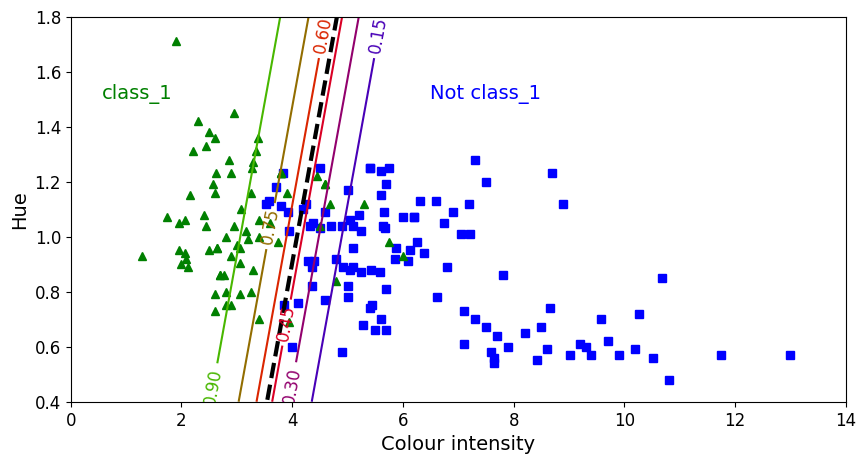

In [10]:
plt.figure(figsize=(10, 5))

# Plot the data points
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

# Plot the decision boundary and probabilities
x0, x1 = np.meshgrid(np.linspace(0, 14, 400).reshape(-1, 1),
                     np.linspace(0.4, 1.8, 400).reshape(-1, 1))

X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

# Solve theta^T x = 0 to determine the boundary, as in the lecture
left_right = np.array([0, 14]) 
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(7.5, 1.5, "Not class_1", fontsize=14, color="b", ha="center")
plt.text(1.2, 1.5, "class_1", fontsize=14, color="g", ha="center")
plt.xlabel("Colour intensity", fontsize=14)
plt.ylabel("Hue", fontsize=14)
plt.axis([0, 14, 0.4, 1.8]);